## Q1. Load and Display an Image

Image shape: (512, 512, 3)
Pixel range: 0.0 1.0


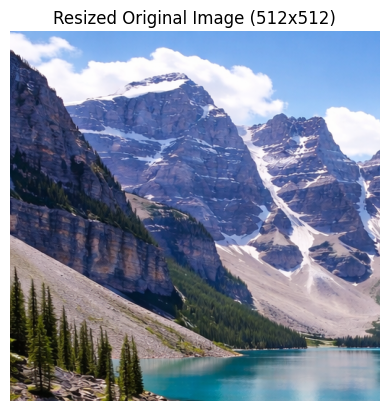

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from the local file
img = mpimg.imread("img.png")

# Resize or crop to 512x512 if needed
img = img[:512, :512, :]

print("Image shape:", img.shape)
print("Pixel range:", img.min(), img.max())

plt.imshow(img)
plt.title("Resized Original Image (512x512)")
plt.axis("off")
plt.show()


## Q2. Separate and Combine Channels

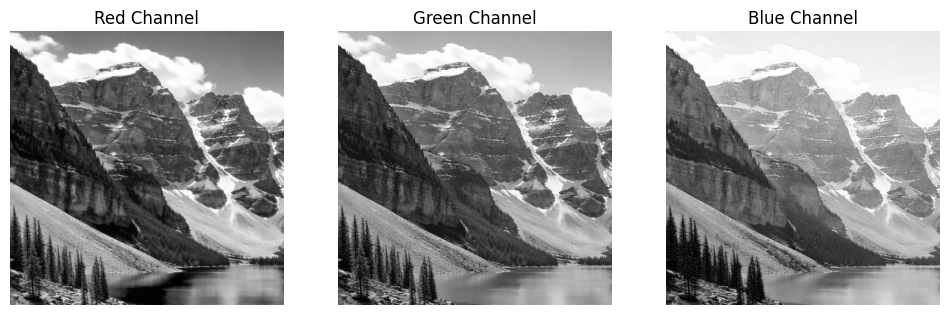

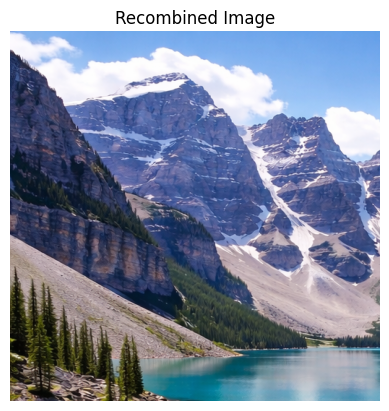

In [13]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")
plt.axis("off")
plt.show()

recombined = np.stack([R, G, B], axis=-1)
plt.imshow(recombined)
plt.title("Recombined Image")
plt.axis("off")
plt.show()

## Q3. Convert to Grayscale (Manually)

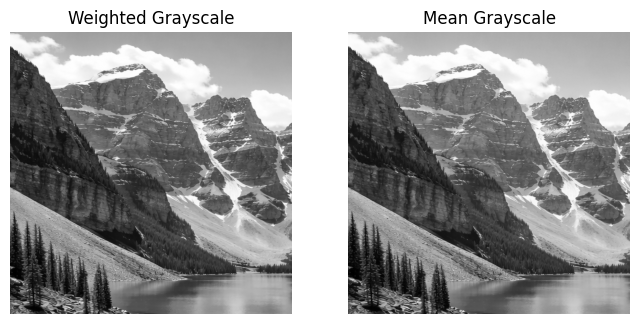

In [14]:
gray_weighted = 0.299*R + 0.587*G + 0.114*B
gray_mean = np.mean(img, axis=2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(gray_weighted, cmap='gray')
plt.title("Weighted Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gray_mean, cmap='gray')
plt.title("Mean Grayscale")
plt.axis("off")
plt.show()

## Q4. Artificial RGB Image

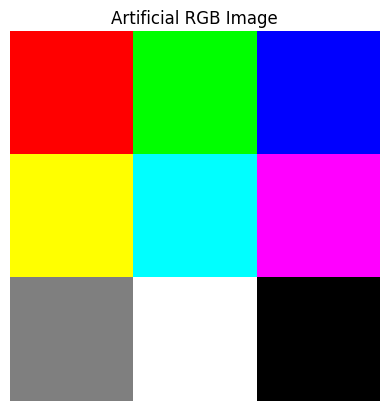

In [15]:
artificial_img = np.array([
    [[1,0,0],[0,1,0],[0,0,1]],
    [[1,1,0],[0,1,1],[1,0,1]],
    [[0.5,0.5,0.5],[1,1,1],[0,0,0]]
])

plt.imshow(artificial_img)
plt.title("Artificial RGB Image")
plt.axis("off")
plt.show()

## Q5. RGB to Brightness

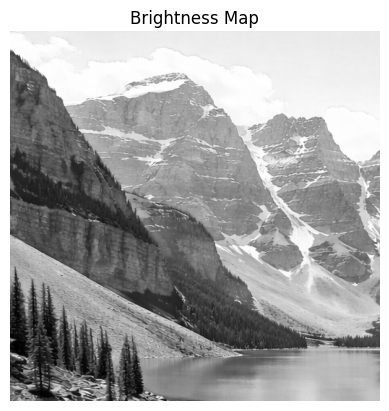

In [16]:
def brightness(img):
    return np.max(img, axis=2)

plt.imshow(brightness(img), cmap='gray')
plt.title("Brightness Map")
plt.axis("off")
plt.show()

## Q6. 3×3 Blur Filter (Manual Convolution)

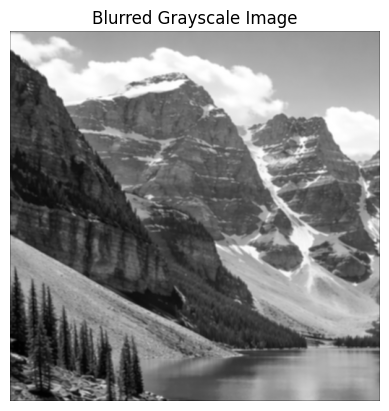

In [17]:
def blur_gray(img):
    kernel = np.ones((3,3)) / 9
    padded = np.pad(img, 1, mode='constant')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+3, j:j+3]
            output[i, j] = np.sum(region * kernel)

    return output

plt.imshow(blur_gray(gray_weighted), cmap='gray')
plt.title("Blurred Grayscale Image")
plt.axis("off")
plt.show()

## Part D. Reflection

1. A convolution kernel applies local operations such as blurring or edge detection.
2. Changing the kernel changes how neighboring pixels influence each other.
3. Weighted grayscale reflects human visual sensitivity better than a simple mean.